In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드


data_path = '/content/combined_output_no_duplicates.csv'
data = pd.read_csv(data_path)

# 격자 경로를 숫자 값으로 변환하기 위한 토크나이저 생성
tokenizer = Tokenizer(char_level=True)  # 문자 단위 토크나이저
tokenizer.fit_on_texts(data['grid_label'])
sequences = tokenizer.texts_to_sequences(data['grid_label'])

# 시퀀스 패딩
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# 라벨 인코딩
data['label'] = data['output'].map({'N': 0, 'AN': 1})  # 비정상 경로가 'AN'인 경우
y = data['label'].values
y = to_categorical(y)  # 원-핫 인코딩

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/15
63/63 [==============================] - 12s 53ms/step - loss: 0.3851 - accuracy: 0.8474 - val_loss: 0.1779 - val_accuracy: 0.9524
Epoch 2/15
63/63 [==============================] - 1s 10ms/step - loss: 0.2349 - accuracy: 0.9237 - val_loss: 0.1574 - val_accuracy: 0.9524
Epoch 3/15
63/63 [==============================] - 1s 11ms/step - loss: 0.1063 - accuracy: 0.9639 - val_loss: 0.1292 - val_accuracy: 0.9683
Epoch 4/15
63/63 [==============================] - 1s 11ms/step - loss: 0.0928 - accuracy: 0.9719 - val_loss: 0.0634 - val_accuracy: 0.9683
Epoch 5/15
63/63 [==============================] - 1s 11ms/step - loss: 0.0870 - accuracy: 0.9719 - val_loss: 0.1244 - val_accuracy: 0.9524
Epoch 6/15
63/63 [==============================] - 1s 12ms/step - loss: 0.0726 - accuracy: 0.9759 - val_loss: 0.0754 - val_accuracy: 0.9683
Epoch 7/15
63/63 [==============================] - 1s 11ms/step - loss: 0.0889 - accuracy: 0.9719 - val_loss: 0.1011 - val_accuracy: 0.9683
Epoch 8/15
6

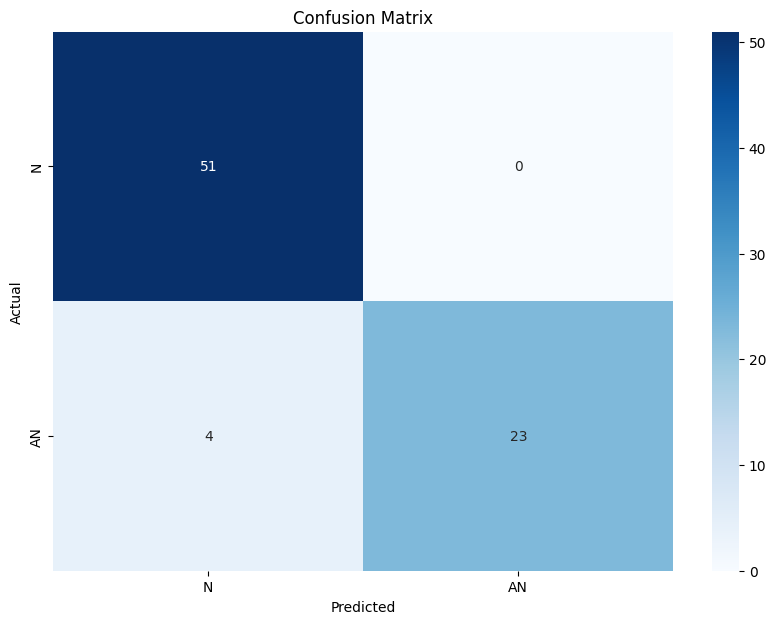

In [ ]:
# 모델 생성
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_sequence_length),
    GRU(512,return_sequences=True),  # GRU 레이어
    GRU(256, return_sequences=True),  # GRU 레이어
    GRU(128, return_sequences=True),  # GRU 레이어
    GRU(64, return_sequences=False),  # GRU 레이어
    Dense(2, activation='softmax'),  # Dense 레이어(출력층)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=4)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'테스트 정확도: {accuracy}')
print('----------------------------------------------')


# Confusion Matrix 계산
y_test_labels = np.argmax(y_test, axis=1)  # 원-핫 인코딩을 정수 라벨로 변환
y_pred_prob = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_prob, axis=1)  # 예측 확률을 정수 라벨로 변환

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Confusion Matrix 출력
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'AN'], yticklabels=['N', 'AN'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# F1 Score 계산
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_test_labels = np.argmax(y_test, axis=1)  # 원-핫 인코딩을 정수 라벨로 변환
y_pred_prob = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_prob, axis=1)  # 예측 확률을 정수 라벨로 변환

precision = precision_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('----------------------------------------------')

3/3 [==============================] - 0s 7ms/step
Precision: 1.0
Recall: 0.8518518518518519
F1 Score: 0.92
----------------------------------------------
